# TMDB 5000 Movie Dataset- Genres- The higher the ranking the more revenue

Does the ranking of a movie have a direct correlation to how much budget there was for the movie? Which Genre has made the most revenue in 2015? 

Introduction:
   The data being used in this project is TMDB 5000 Movie Data set provided by Kaggle. Each of the columns are fairly straight forward to understand apart from budget adj and revenue adj. These columns are the adjusted values of budget and revenue after inflation however we will not be using these values since we are just looking for the overall revenue and budget for our two unanswered questions. 

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
df_movies = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

Now that we have uploaded the data as well as all the packages necessary it is time to take a look at the actual data and see what information we need to answer our questions.

In [4]:
df_movies.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Looking at the data we can see that there are 21 columns and 10866 rows. Since the columns that are necessary for our two burning questions are budget, revenue, genres, release_year lets take a look to see which values are missing from the genres column

In [7]:
df_movies[df_movies.genres.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


Since there are only 23 lines in the missing dataset of 10866 (<1% of the whole dataset) we can just remove these values but this will be in the data cleaning portion.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83a5bfc828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f83a5965828>]], dtype=object)

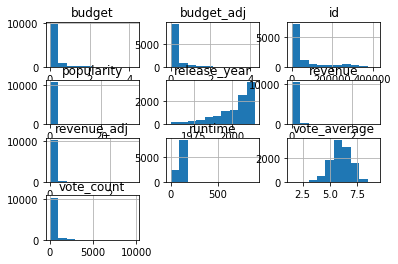

In [9]:
df_movies.hist()

In [10]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Looking at the histograms and the statistics summary we can see that budget and revenue are heavily skewed to the right and the voting average is skewed slightly to the left. The years we have in this data set are between 1960-2015, and the voting average which is key to answering one of our questions is roughly 6 but ranges from 1.5-9.2. The assumption is the voting average is out of 10 


### Data Cleaning - Removing nulls, and changing format taking only data that is needed

In [11]:
df_movies = df_movies.dropna(axis=0, subset=['genres'])

The first thing we wanted to do is remove the null values.

In [12]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 21 columns):
id                      10843 non-null int64
imdb_id                 10835 non-null object
popularity              10843 non-null float64
budget                  10843 non-null int64
revenue                 10843 non-null int64
original_title          10843 non-null object
cast                    10768 non-null object
homepage                2931 non-null object
director                10801 non-null object
tagline                 8037 non-null object
keywords                9368 non-null object
overview                10840 non-null object
runtime                 10843 non-null int64
genres                  10843 non-null object
production_companies    9827 non-null object
release_date            10843 non-null object
vote_count              10843 non-null int64
vote_average            10843 non-null float64
release_year            10843 non-null int64
budget_adj              1

We have now removed the 23 missing values from the genres column and can move forward with making the data more readable.

In [13]:
df_movies['genres'] = df_movies['genres'].str.replace('|',',')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,"Action,Adventure,Science Fiction,Thriller",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,"Action,Adventure,Science Fiction,Thriller",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,"Adventure,Science Fiction,Thriller",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,"Action,Adventure,Science Fiction,Fantasy",Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,"Action,Crime,Thriller",Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Due to the readability in the genres column it is important to remove the | and replace it with commas. Lets now create two seperate dataframes to answer our two burning questions: is the rating of a movie directly correlated to how much budget is put towards a movie? and which genres have produced the most revenue in 2015?

In [14]:
df_movies1 = df_movies[['budget', 'original_title', 'vote_average']]

In [15]:
df_movies2 = df_movies[['genres', 'revenue', 'release_year' ]]

### Is the rating of a movie directly correlated to how much budget is put towards the movie? (Hypothesis: the greater the budget the better the rating)

In [16]:
df_movies1.head()

,budget,original_title,vote_average
0,150000000,Jurassic World,6.5
1,150000000,Mad Max: Fury Road,7.1
2,110000000,Insurgent,6.3
3,200000000,Star Wars: The Force Awakens,7.5
4,190000000,Furious 7,7.3


In [17]:
df_movies1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 3 columns):
budget            10843 non-null int64
original_title    10843 non-null object
vote_average      10843 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 338.8+ KB


it is always good to double check and see that all columns have values, since we are exploring whether the voting average and budget are correlated, we need to sort the voting average descending.

In [18]:
df_movies1= df_movies1.sort_values('vote_average',
                                     ascending=False)

In [19]:
df_movies1.head(2)


,budget,original_title,vote_average
3894,0,The Story of Film: An Odyssey,9.2
538,0,The Mask You Live In,8.9


In [22]:
result = [] 
for value in df_movies1["vote_average"]: 
    if value >= 6: 
        result.append("Good Movies") 
    elif value < 6 and value > 3: 
        result.append("Okay Movies") 
    else: 
        result.append("Bad Movies") 
       
df_movies1["Result"] = result    
print(df_movies1) 

          budget                                     original_title  \
3894           0                      The Story of Film: An Odyssey   
538            0                               The Mask You Live In   
1200           0                      Black Mirror: White Christmas   
2269           0                                        Life Cycles   
6911           0                                  Pink Floyd: Pulse   
2401           0    Opeth: In Live Concert At The Royal Albert Hall   
3690           0                                  The Art of Flight   
3224           0  John Mayer: Where the Light Is Live in Los Ang...   
8221           0  A Personal Journey with Martin Scorsese Throug...   
8411           0                              Queen - Rock Montreal   
8839           0                Dave Chappelle: Killin' Them Softly   
2397           0                     The Making of The Walking Dead   
2334           0                     Rush: Beyond the Lighted Stage   
5923  

Lets break down the rankings of movies to see which ratings are good, bad or just ok. Good being ratings over 6, ok being between 3 and 6 and bad movies being under 3

In [35]:
df_movies1

,budget,original_title,vote_average,Result
4178,25000000,The Shawshank Redemption,8.4,Good Movies
7948,1200000,Stop Making Sense,8.4,Good Movies
5986,4000000,"Guten Tag, RamÃ³n",8.4,Good Movies
7269,6000000,The Godfather,8.3,Good Movies
650,3300000,Whiplash,8.2,Good Movies
2409,63000000,Fight Club,8.1,Good Movies
3826,30000000,Kill Bill: The Whole Bloody Affair,8.1,Good Movies
4946,110,Bones Brigade: An Autobiography,8.1,Good Movies
8043,1100000,Michael Jackson's Thriller,8.1,Good Movies
9758,13000000,The Godfather: Part II,8.1,Good Movies


we want to get a better view so lets take all movies ranked over 8 with their budget to see if the budget and voting are correlated

In [36]:
df_movies1 = df_movies1[df_movies1.vote_average >= 8.0]
df_movies1.head(5)

,budget,original_title,vote_average,Result
4178,25000000,The Shawshank Redemption,8.4,Good Movies
7948,1200000,Stop Making Sense,8.4,Good Movies
5986,4000000,"Guten Tag, RamÃ³n",8.4,Good Movies
7269,6000000,The Godfather,8.3,Good Movies
650,3300000,Whiplash,8.2,Good Movies


We know that the budget is our independant variable and the voting average is the dependant variable, it is good to see a visual of how our data is distributed.


Text(0.5,1,'Budget Distribution')

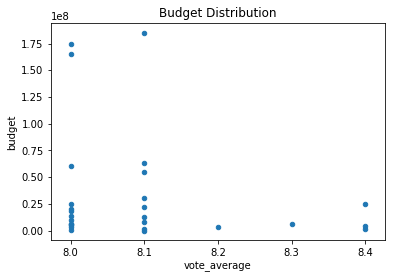

In [37]:
df_movies1.plot(x='vote_average', y='budget', kind='scatter')
plt.title('Budget Distribution')

Since the data does not show the distribution, let's remove all budgets that are zero, as well as change the graph since it doesn't display the variety in budget over the voting average.

In [38]:
df_movies1 = df_movies1[df_movies1.budget != 0]

In [27]:
df_movies1.head(20)

,budget,original_title,vote_average,Result
4178,25000000,The Shawshank Redemption,8.4,Good Movies
7948,1200000,Stop Making Sense,8.4,Good Movies
5986,4000000,"Guten Tag, RamÃ³n",8.4,Good Movies
7269,6000000,The Godfather,8.3,Good Movies
650,3300000,Whiplash,8.2,Good Movies
2409,63000000,Fight Club,8.1,Good Movies
3826,30000000,Kill Bill: The Whole Bloody Affair,8.1,Good Movies
4946,110,Bones Brigade: An Autobiography,8.1,Good Movies
8043,1100000,Michael Jackson's Thriller,8.1,Good Movies
9758,13000000,The Godfather: Part II,8.1,Good Movies


Text(0.5,1,'Budget Distribution')

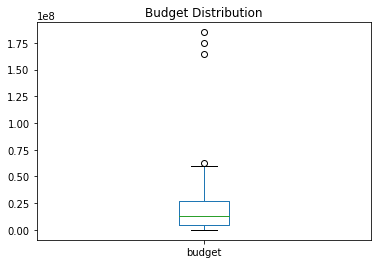

In [39]:
df_movies1['budget'].plot(kind='box')
plt.title('Budget Distribution')

As we can see above in our table, it is clear that budget is not a direct reflection on the vote average. As we can see the max budget paid for a movie at $185000000 for the Dark Knight had a lower voting average than other movies that were voted higher with a lower budget.

### Research Question 2  Which top genres of movies that were released had the most revenue?

In [40]:
df_movies2.head()

,genres,revenue,release_year
3,"Action,Adventure,Science Fiction,Fantasy",2068178225,2015
0,"Action,Adventure,Science Fiction,Thriller",1513528810,2015
4,"Action,Crime,Thriller",1506249360,2015
14,"Action,Adventure,Science Fiction",1405035767,2015
8,"Family,Animation,Adventure,Comedy",1156730962,2015


Lets have revenue sorted from largest to smallest

In [41]:
df_movies2= df_movies2.sort_values('revenue', ascending=False)
df_movies2.head()

,genres,revenue,release_year
3,"Action,Adventure,Science Fiction,Fantasy",2068178225,2015
0,"Action,Adventure,Science Fiction,Thriller",1513528810,2015
4,"Action,Crime,Thriller",1506249360,2015
14,"Action,Adventure,Science Fiction",1405035767,2015
8,"Family,Animation,Adventure,Comedy",1156730962,2015


Now that we have the columns we need as well as the sorted revenue largest to smallest, it is time to filter the year to 2015 to see which genre had earned the most money.

In [42]:
df_movies2=df_movies2[df_movies2.release_year ==2015]

In [43]:
df_movies2.head()

,genres,revenue,release_year
3,"Action,Adventure,Science Fiction,Fantasy",2068178225,2015
0,"Action,Adventure,Science Fiction,Thriller",1513528810,2015
4,"Action,Crime,Thriller",1506249360,2015
14,"Action,Adventure,Science Fiction",1405035767,2015
8,"Family,Animation,Adventure,Comedy",1156730962,2015


In [44]:
df_movies2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627 entries, 3 to 505
Data columns (total 3 columns):
genres          627 non-null object
revenue         627 non-null int64
release_year    627 non-null int64
dtypes: int64(2), object(1)
memory usage: 19.6+ KB


In [45]:
df_movies2=df_movies2.iloc[:9]
df_movies2

,genres,revenue,release_year
3,"Action,Adventure,Science Fiction,Fantasy",2068178225,2015
0,"Action,Adventure,Science Fiction,Thriller",1513528810,2015
4,"Action,Crime,Thriller",1506249360,2015
14,"Action,Adventure,Science Fiction",1405035767,2015
8,"Family,Animation,Adventure,Comedy",1156730962,2015
10,"Action,Adventure,Crime",880674609,2015
9,"Comedy,Animation,Family",853708609,2015
25,Action,682330139,2015
19,"War,Adventure,Science Fiction",650523427,2015


Now that we have all of our necessary data we can do a visualization to see which genres have pulled in the most revenue in 2015

NameError: name 'ax' is not defined

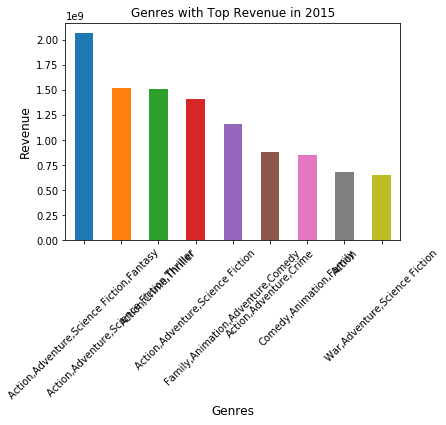

In [62]:
df_movies2.plot(x= 'genres', y='revenue', kind='bar')
plt.legend('',frameon=False)
plt.title('Genres with Top Revenue in 2015')
plt.ylabel('Revenue', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.xticks(rotation=45)
xaxis.set_tick_params(horizontalalignment='left')

In [61]:
plt.bar(x= df_movies1['genres'], y= df_movies1['revenue'])

KeyError: 'genres'

The top genres in 2015 that produced the most revenue are: Action, Adventure, Fantasy, Science Fiction pulling in roughly 2 billion dollars. The visualization is difficult to read due to the genres having multiple different genres within the title, however the table answers which are the top genres of 2015. Just for fun the worst genres of 2015 are: 

In [53]:
df_movies2.tail()

,genres,revenue,release_year
8,"Family,Animation,Adventure,Comedy",1156730962,2015
10,"Action,Adventure,Crime",880674609,2015
9,"Comedy,Animation,Family",853708609,2015
25,Action,682330139,2015
19,"War,Adventure,Science Fiction",650523427,2015


<a id='conclusions'></a>
## Conclusions
The conclusions to my presentation are that budget and vote average are not in correlation even though the assumption was that if there is more budget towards a film the better the voting average will be. This was not a true hypothesis. It is clear that even though the Dark Knight had the largest budget it was still not the highest in votes.

The second observation was that in 2015 the top genres were Action Adventure and the least favourite was Drama.

## Limitations
Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.
Limiting the entries to only top 10 genres for all revenue will also skew results because it doesn't account for all genres but only the ones that made the most revenue.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0